In [7]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [8]:
# load the dataset
x_train, y_train = load_data()

In [9]:
# printing x datasets
print("x is of type: ", type(x_train))
print(f"First five data in x: ",x_train[:5])

x is of type:  <class 'numpy.ndarray'>
First five data in x:  [6.1101 5.5277 8.5186 7.0032 5.8598]


In [10]:
# printing y datasets
print("y is type of: ",type(y_train))
print("First five dataset of y: ",y_train[:5])

y is type of:  <class 'numpy.ndarray'>
First five dataset of y:  [17.592   9.1302 13.662  11.854   6.8233]


In [11]:
print("Shape of x_train is: ",x_train.shape)
print("shape of y_train is: ",y_train.shape)
print("Number of training examples m:",len(x_train))

Shape of x_train is:  (97,)
shape of y_train is:  (97,)
Number of training examples m: 97


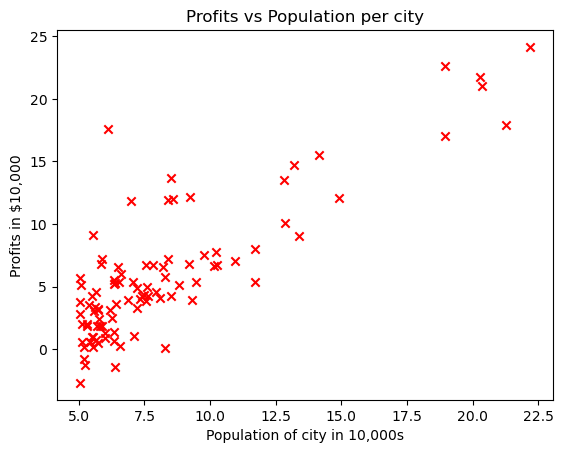

In [12]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("Profits vs Population per city")
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profits in $10,000")
plt.show()

In [13]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    total_cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=cost+(f_wb-y[i])**2

    total_cost=cost/(2*m)
    return total_cost

In [14]:

# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w (zeros): 75.203
All tests passed!


In [15]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw=(f_wb-y[i])*x[i]+dj_dw
        dj_db=(f_wb-y[i])+dj_db

    dj_dw=dj_dw/m
    dj_db=dj_db/m

    return dj_dw,dj_db

In [16]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [17]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [18]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alfa,iterations):
    j_history=[]
    w_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    cost=cost_function(x,y,w,b)
    print(cost)
    for i in range(iterations):
        dj_dw,dj_db=gradient_function(x,y,w,b)
        cost=cost_function(x,y,w,b)
        w_history.append(w)
        j_history.append(cost)
        w=w-alfa*dj_dw
        b=b-alfa*dj_db
        if i%150==0:
            print(f"Iterations {i:4} Cost {float(j_history[i]):.2f}")
        
    return w,b,j_history,w_history

In [19]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

32.072733877455654
Iterations    0 Cost 32.07
Iterations  150 Cost 5.31
Iterations  300 Cost 4.96
Iterations  450 Cost 4.76
Iterations  600 Cost 4.64
Iterations  750 Cost 4.57
Iterations  900 Cost 4.53
Iterations 1050 Cost 4.51
Iterations 1200 Cost 4.50
Iterations 1350 Cost 4.49
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [20]:
m=x_train.shape[0]
predicted=np.zeros(m)
for i in range(m):
    predicted[i]=w*x_train[i]+b

Text(0, 0.5, 'Price in $10,000')

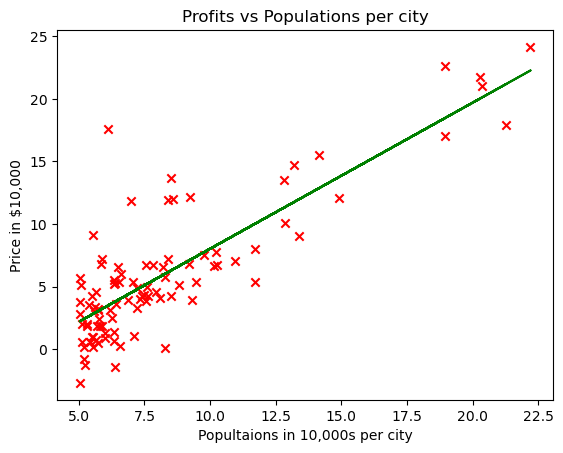

In [21]:
plt.plot(x_train,predicted,c='g')
plt.scatter(x_train,y_train,c='r',marker='x')
plt.title("Profits vs Populations per city")
plt.xlabel("Popultaions in 10,000s per city")
plt.ylabel("Price in $10,000")

In [22]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
